<a href="https://colab.research.google.com/github/Kajalkumbhare01/CODSOFT/blob/main/TASK_2_CODSOFT_INTERNSHIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 2 - MOVIE RATING PREDICTION WITH PYTHON**

> **Author:  Kajal Kumbhare**

> **Batch: May 2024**

> **Domain: Data Science**

> **Aim: Build a model that predicts the rating of a movie based on features like genres, director and actors.**




**Github Link** :


#### **1. Project Introduction**

In the world of entertainment, movies play a crucial role in our lives. With the vast amount of movies released every year, predicting how a movie will be rated by audiences can provide valuable insights for producers, directors, and viewers alike. This project aims to develop a predictive model that forecasts movie ratings based on various features using Python.

Using a dataset that includes details such as genre, director, cast, budget, release date, and other relevant attributes, we will employ machine learning techniques to analyze and predict the ratings that movies will receive. The primary goal is to understand the factors that most significantly influence movie ratings and to build a model that can accurately predict these ratings.

#### **2.Problem Statement**

### Problem Statement: Movie Rating Prediction Using Python

The objective of this project is to develop a machine learning model that can accurately predict movie ratings based on various attributes such as genre, director, rating, votes, and year. The model should analyze a dataset of movies to identify key factors that influence ratings and provide accurate predictions for new movies.

The specific goals of this project are:
1. **Data Preprocessing:** Clean and prepare the dataset, including handling missing values, encoding categorical variables, and normalizing numerical features.
2. **Feature Engineering:** Identify and create features that enhance the predictive power of the model.
3. **Model Training:** Train multiple machine learning models using the prepared dataset and select the best-performing model based on evaluation metrics.
4. **Model Evaluation:** Assess the performance of the model using appropriate metrics such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE), and refine the model for improved accuracy.
5. **Result Interpretation:** Understand the most significant factors influencing movie ratings and provide insights based on the model's predictions.

The successful completion of this project will result in a robust predictive model that can forecast movie ratings, offering valuable insights to stakeholders in the movie industry and showcasing the application of Python in data science and machine learning.

#### **2. Collect Data**

#### Import Libraries

In [ ]:
# Import Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


#### Dataset Loading

In [ ]:
# Load dataset
data = pd.read_csv('Movie Rating Prediction.csv', encoding='latin1')

#### Dataset First View

In [ ]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


#### **3. Explore and Analyze Data**

In [ ]:
# head: It is used to print first 5 rows
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
# tail: It is used to print last 5 rows
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
# Count rows and columns
data.shape
print(f'Number of Rows: {len(data.axes[0])}')
print(f'Number od Columns: {len(data.axes[1])}')

Number of Rows: 15509
Number od Columns: 10


In [ ]:
# dtypes: It is used to find data type of each column
data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
# info: It is used find data type as well as memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# describe: It is used to give the statistical report of each column
data.describe()
# if std = 0, it means you have a constant column then you have to drop that column.

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


**Univariate Analysis**

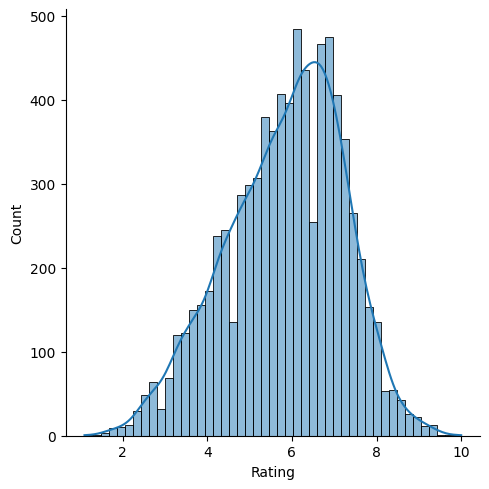

In [ ]:
# Univariate Analysis
# Check the distribution of Target column
sns.displot(x=data.Rating, kde=True)
plt.show()

Data is normal if skewness values lies within (-0.5 to 0.5) otherwise it is not normal.

In [ ]:
data.Rating.skew()   # Rating Distribution is not normal.

-0.345551925659791

#### **Data Preprocessing**

#### Missing Values

In [ ]:
# Check for missing values
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

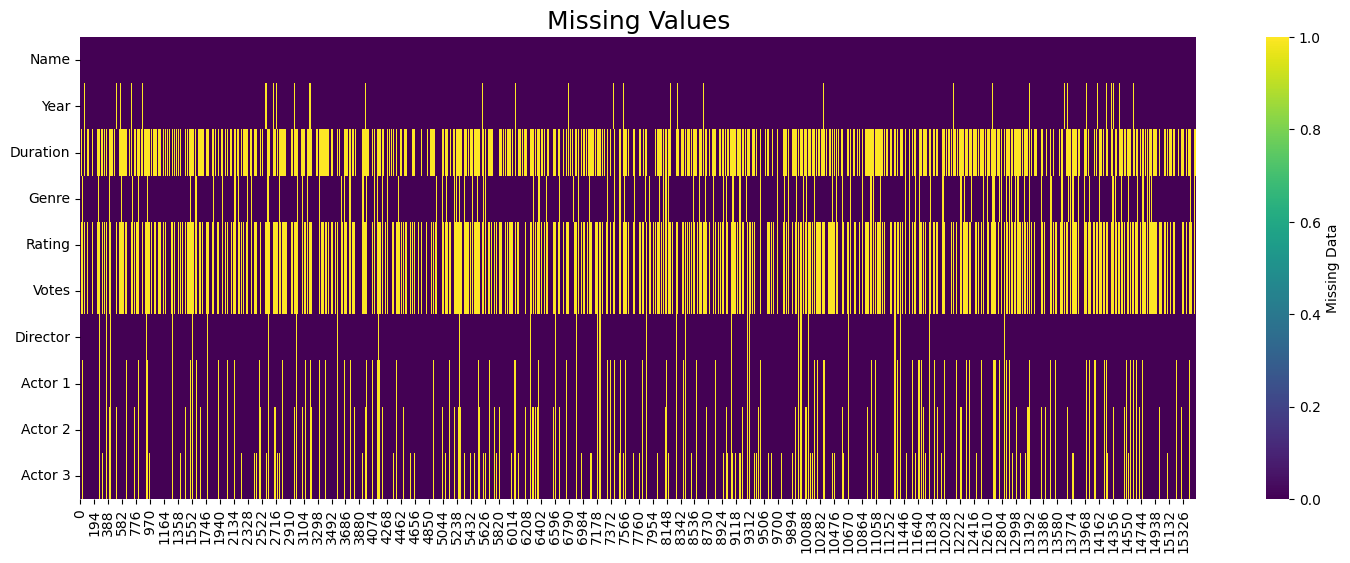

In [ ]:
# Visualizing the missing values using seaborn heatmap
plt.figure(figsize=(18,6))
sns.heatmap(data.isna().transpose(),
            cmap='viridis',
            cbar_kws={'label': 'Missing Data'})
plt.title('Missing Values', fontsize=18)
plt.show()


#### Handling Missing Values

In [ ]:
# replacing the missing values with 0
data['Year'].fillna(0, inplace=True)
data['Duration'].fillna(0, inplace=True)
data['Genre'].fillna(0, inplace=True)
data['Rating'].fillna(0, inplace=True)
data['Votes'].fillna(0, inplace=True)
data['Director'].fillna(0, inplace=True)
data['Actor 1'].fillna('-', inplace=True)
data['Actor 2'].fillna('-', inplace=True)
data['Actor 3'].fillna('-', inplace=True)

In [ ]:
# after handling missing values
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,0,0,Drama,0.0,0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",0.0,0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,0.0,0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),0,Action,0.0,0,Kiran Thej,Sangeeta Tiwari,-,-
15507,Zulmi Shikari,(1988),0,Action,0.0,0,0,-,-,-


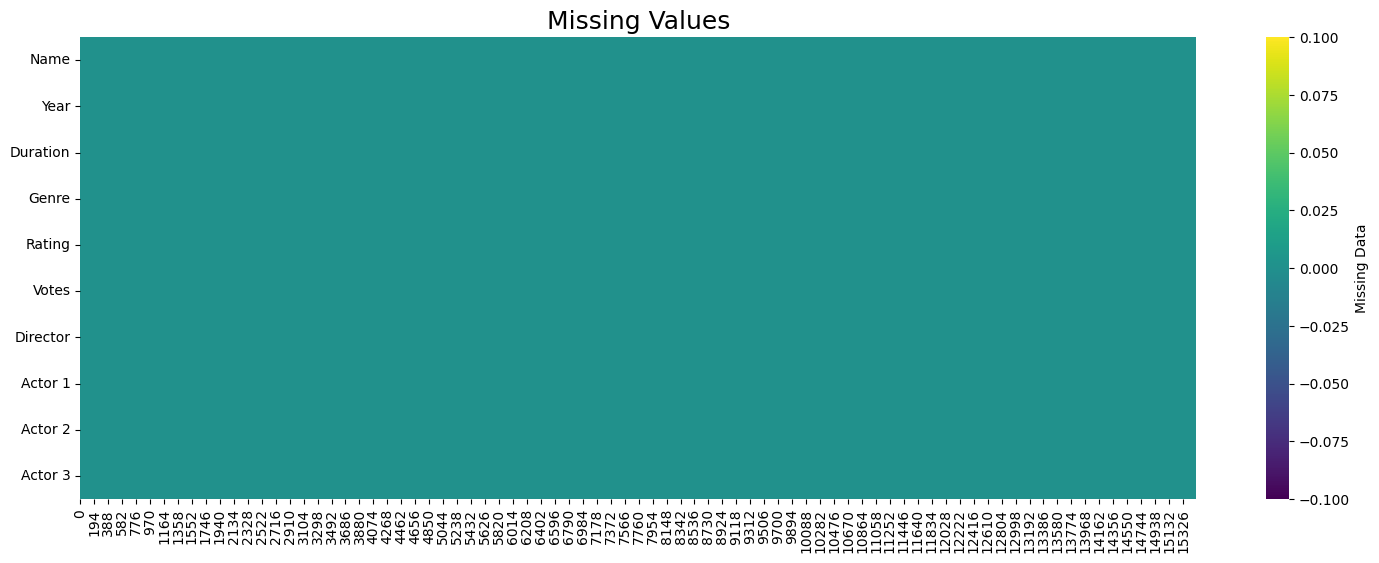

In [ ]:
# visualization of data after handling missing values
plt.figure(figsize=(18,6))
sns.heatmap(data.isna().transpose(),
            cmap='viridis',
            cbar_kws={'label': 'Missing Data'})
plt.title('Missing Values', fontsize=18)
plt.show()

In [ ]:
# Check for duplicates
data.duplicated().sum()

6

In [ ]:
# Dropping the duplicate values
data.drop_duplicates(inplace=True)

In [ ]:
# after dropping the duplicate values
data.duplicated().sum()

0

<Axes: xlabel='Rating'>

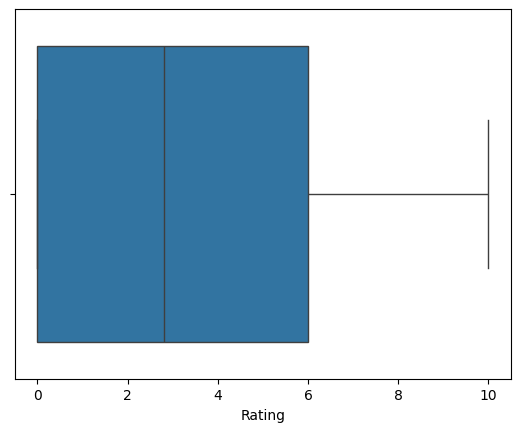

In [ ]:
# Check for outliers in numerical columns
sns.boxplot(x=data.Rating)


#### **Split Data**

In [ ]:
# Split data as input and output
x = data.drop('Rating', axis=1)
y = data.Rating

In [ ]:
x

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,,0,0,Drama,0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),0,Action,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),0,Action,0,Kiran Thej,Sangeeta Tiwari,-,-
15507,Zulmi Shikari,(1988),0,Action,0,0,-,-,-


In [ ]:
y

0        0.0
1        7.0
2        0.0
3        4.4
4        0.0
        ... 
15504    4.6
15505    4.5
15506    0.0
15507    0.0
15508    6.2
Name: Rating, Length: 15503, dtype: float64

#### **Split Data for Training and Testing**

In [ ]:
# Sklearn: It is one of the scientific library which include all the packages related to machine learning
# such as regression, classification, clustering, data preprocessing.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (10852, 9)
x_test (4651, 9)
y_train (10852,)
y_test (4651,)
